# Proyek Analisis Data: Bike Sharing Dataset
> - Nama: Ahmad Jundullah Abu Jidan
> - Email: ahmadjidan1912@gmail.com
> - ID Dicoding: abu_jidan

# Menentukan Pertanyaan Bisnis
1. Berapa jumlah total persewaan sepeda per jam
2. Berapa jumlah total sewa sepeda berdasarkan musim 
3. Hubungan jumlah sepeda yang disewa dengan kenaikan temperatur suhu di setiap musimnya

# Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

In [12]:
Datahour = pd.read_csv("C:/Users/suko bawaslu/OneDrive - Institut Teknologi Sepuluh Nopember/MSIB preparation/Bangkit 2023/Dicoding/archive data bike/hour.csv")
Datahour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [13]:
Dataday = pd.read_csv("C:/Users/suko bawaslu/OneDrive - Institut Teknologi Sepuluh Nopember/MSIB preparation/Bangkit 2023/Dicoding/archive data bike/day.csv")
Dataday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [22]:
Databike = pd.merge(
    left=Datahour,
    right=Dataday,
    how="inner",
    suffixes=("_hour", "_day"),
    left_on="dteday",
    right_on="dteday"
)

Databike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


## Assessing Data

#### Memeriksa tipe data didalam setiap feature pada Databike

In [23]:
Databike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

Ditemukan bahwa tipe data pada feature "dteday" adalah object. Maka diganti ke tipe data date & time

#### Menilai databike

In [26]:
Databike.isna().sum()

instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64

Tidak ditemukan missing value pada Databike

In [27]:
print("Jumlah duplikasi: ", Databike.duplicated().sum())

Jumlah duplikasi:  0


## Cleaning Data

Mengubah tipe data feature "dteday" dari object menjadi date & time

In [28]:
datetime_columns = ["dteday"]

for i in datetime_columns:
    Databike[i] = pd.to_datetime(Databike[i])
    
#cek apakah sudah terganti
Databike.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

# Exploratory Data Analysis (EDA)

 Tambah feature baru yaitu Season Labels agar lebih mudah dipahami

In [41]:
# Definisi fungsi untuk mengubah nilai season_hour menjadi season_labels
def label_season(season_hour):
    if season_hour == 1:
        return 'springer'
    elif season_hour == 2:
        return 'summer'
    elif season_hour == 3:
        return 'fall'
    else:
        return 'winter'

# Menambahkan kolom baru 'season_labels' berdasarkan kondisi pada kolom 'season_hour'
Databike['season_labels'] = Databike['season_hour'].apply(lambda x: label_season(x))

# Menampilkan DataFrame dengan kolom baru
Databike.head()


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_labels
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer


#### staitistik deskriptif Databike

In [42]:
Databike.describe(include='all')

C:\Users\suko bawaslu\AppData\Local\Temp\ipykernel_8672\1283234210.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Databike.describe(include='all')


,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,season_labels
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fall
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN


#### Jumlah total sewa sepeda berdasarkan jam

In [43]:
Databike.groupby('hr')['cnt_hour'].sum().reset_index()

,hr,cnt_hour
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


#### Jumlah total sewa sepeda berdasarkan musim

In [44]:
Databike.groupby('season_labels')['cnt_day'].sum().reset_index()

,season_labels,cnt_day
0,fall,25420803
1,springer,11179147
2,summer,22024071
3,winter,20167029


# Visualization & Explanatory Analysis

## Pertanyaan 1: Berapa jumlah total persewaan sepeda per jam 

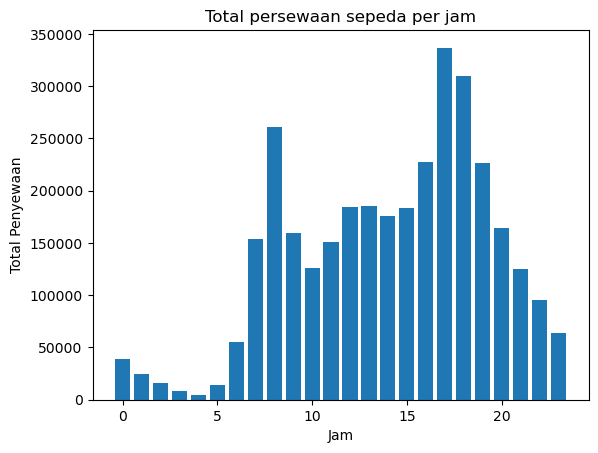

In [53]:
sewa_jam = Databike.groupby('hr')['cnt_hour'].sum()

plt.bar(sewa_jam.index, sewa_jam.values, color='#1f77b4')

plt.title('Total persewaan sepeda per jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')

plt.show()


Total persewaan sepeda paling tinggi yaitu pada jam 17 dan 18 atau jam 5 PM dan 6 PM. Sedangkan paling sedikit yaitu pada jam 4 AM.

## Pertanyaan 2: Berapa jumlah total sewa sepeda berdasarkan musim

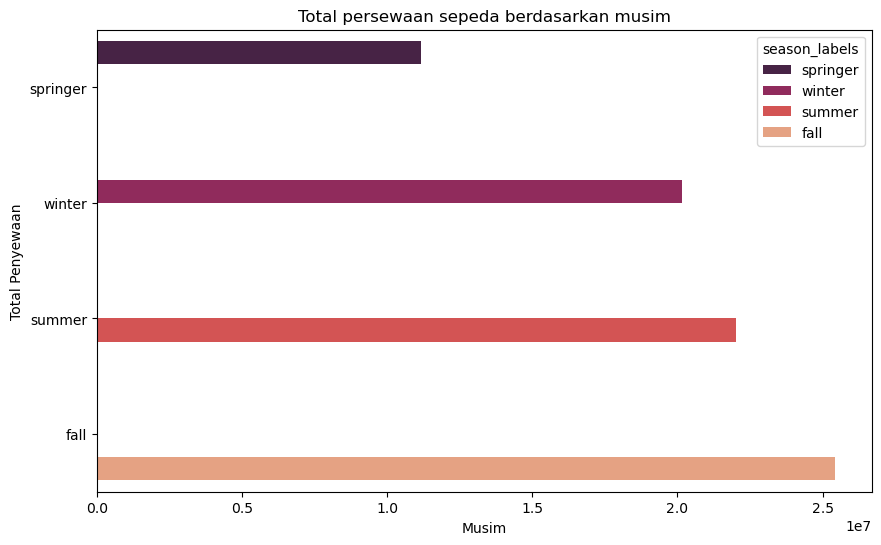

In [74]:
sewa_musim = Databike.groupby('season_labels')['cnt_day'].sum().reset_index().sort_values('cnt_day')

plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='season_labels', hue = 'season_labels', data=sewa_musim, palette='rocket')

plt.title('Total persewaan sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')

plt.show()

Text(0.5, 1.0, 'Total persewaan sepeda berdasarkan musim')

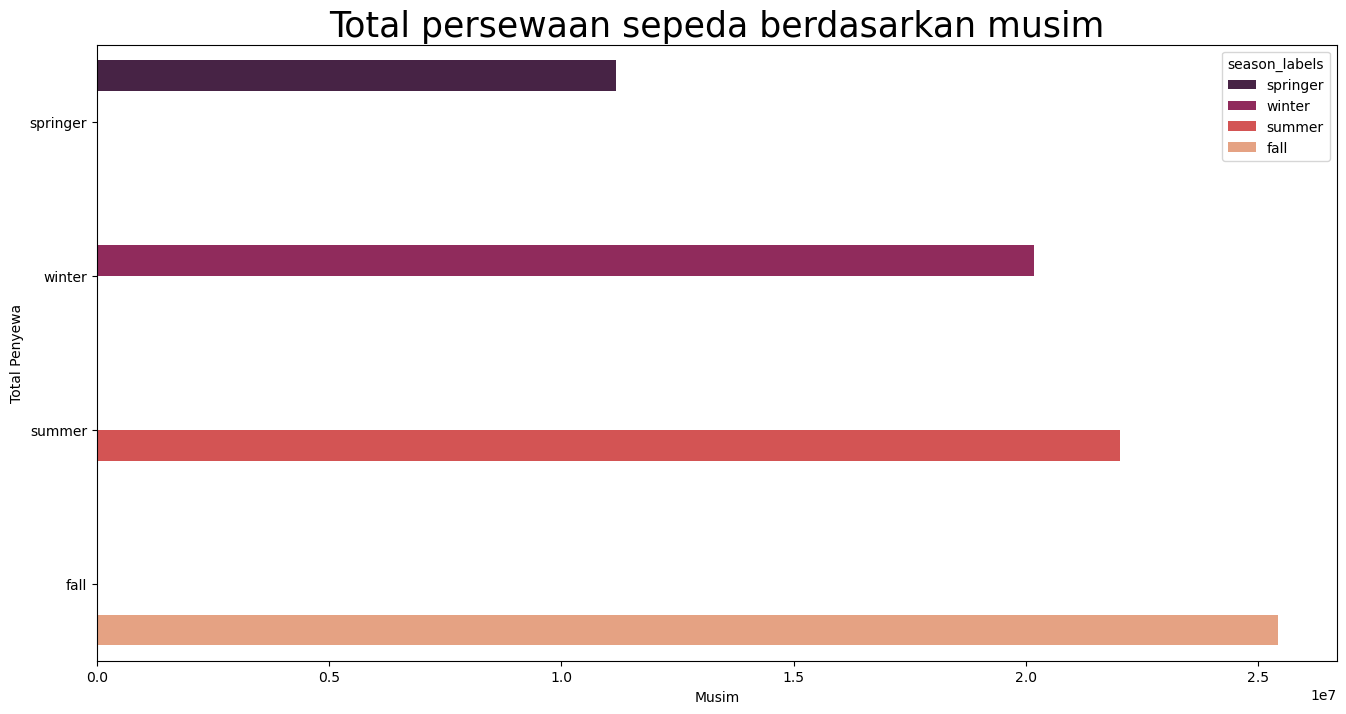

In [77]:
fig, ax = plt.subplots(figsize=(16, 8))

bike_day_season = Databike.groupby(by=['season_labels']).cnt_day.sum().reset_index().sort_values('cnt_day')
sns.barplot(x=bike_day_season['cnt_day'], y=bike_day_season['season_labels'], hue=bike_day_season['season_labels'], palette='rocket')
plt.xlabel("Musim")
plt.ylabel("Total Penyewa")
plt.title("Total persewaan sepeda berdasarkan musim", loc="center", fontsize=25)


Berdasarkan visualisasi di atas,saat musim fall (gugur) merupakan musim yang digemari oleh pelanggan untuk menyewa sepeda. Sedangkan saat musim springer (semi), pelanggan cenderung jarang menyewa sepeda. 

## Pertanyaan 3: Hubungan jumlah sepeda yang disewa dengan kenaikan temperatur suhu di setiap musimnya

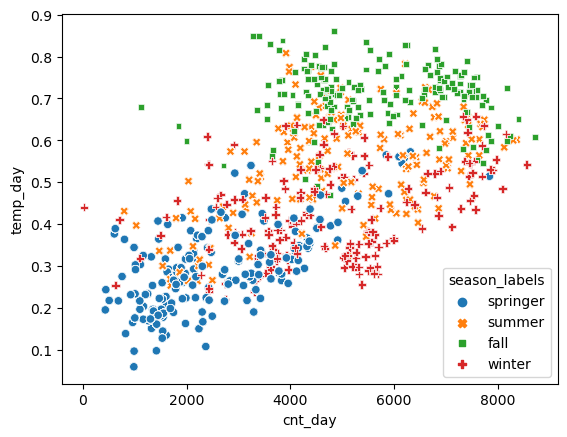

In [68]:
sns.scatterplot(data=Databike, x="cnt_day", y="temp_day", hue="season_labels", style="season_labels")
plt.show() 

Berdasarkan visualisasi scatterplot di atas, dapat dilihat bahwa penyewa sepeda ketika musim fall (gugur) banyak melakukan penyewaan ketika suhu temperatur cenderung hangat. 

# Conclusion

## Conclution pertanyaan 1
Persewaan sepeda banyak digunakan saat pagi hari yaitu pukul 8 AM dan paling banyak ketika sore yaitu pukul 5  PM. Hal ini mungkin saja ketika di pagi hari orang banyak menggunakan sepeda untuk berkanngkat menuju tempat kerja, sekolah, dan lain-lain. Kemudian, saat waktu pulang sore hari mereka juga memilih untuk menyewa sepeda untuk transportasi pulang.

## Conclution pertanyaan 2

Persewaan sepeda banyak terjadi pada saat musim fall (gugur) mungkin saja dikarenakan pada musim itu orang-orang ingin menuju tempat tujuan dengan cepat dan fleksibel sembari mereka berolahraga untuk mengeluarkan keringat.

## Conclution pertanyaan 3
Pada saat musim fall (gugur) orang-orang cenderung menyewa sepeda pada suhu temperatur yang relatif tinggi apabila dibandingkan dengan suhu kecenderungan penyewa sepeda pada musim lain. Hal ini mungkin saja dikarenakan mereka ingin bersepeda di musim fall (gugur) dengan kondisi hangat. 

#### download Databike

In [69]:
Databike.to_csv("Databike.csv", index=False)